# EduPulse: School & Student Insights Dashboard

## Project Objective

The objective of this project is to simulate and analyze a comprehensive education dataset to uncover insights into school performance trends across regions and demographic groups. 

The goal is to support data-driven decisions aimed at improving educational outcomes for children, particularly in the post-COVID era.

## Key Questions to be Addressed

1. How did COVID-19 impact student performance across academic terms and years?

2. Which regions or school types consistently performed better?

3. Is there a relationship between household income and student academic scores?

4. What is the impact of parental education on student performance?

# Step 1: Data Generation

* Synthetic datasets will be programmatically generated using Python to simulate real-world school systems.

In [2]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import os

fake = Faker()

# Parameters
num_students = 1000
num_schools = 10
num_years = 5
terms = ["Term1", "Term2", "Term3"]
subjects = ["Math", "English", "Science", "Social Studies", "ICT"]

# Lookup tables
school_types = pd.DataFrame({
    "SchoolType_ID": ["TYP-0001", "TYP-0002"],
    "SchoolType": ["Public", "Private"]
})

boarding_statuses = pd.DataFrame({
    "BoardingStatus_ID": ["BRD-0001", "BRD-0002"],
    "BoardingStatus": ["Boarding", "Day"]
})

countries = ["Utopia", "Val Verde", "Wakanda", "Montalei"]
country_df = pd.DataFrame({
    "Country_ID": [f"CTR-{str(i+1).zfill(4)}" for i in range(len(countries))],
    "Country": countries
})

regions = [fake.state() for _ in range(10)]
region_df = pd.DataFrame({
    "Region_ID": [f"REG-{str(i+1).zfill(4)}" for i in range(len(regions))],
    "Region": regions
})

counties = [fake.city() for _ in range(10)]
county_df = pd.DataFrame({
    "County_ID": [f"CNT-{str(i+1).zfill(4)}" for i in range(len(counties))],
    "County": counties
})

education_levels = ["None", "Primary", "Secondary", "Vocational", "Tertiary"]
parent_edu_df = pd.DataFrame({
    "ParentEdu_ID": [f"PED-{str(i+1).zfill(4)}" for i in range(len(education_levels))],
    "Parent_Education": education_levels
})

income_brackets = ["<20K", "20K-50K", "50K-100K", "100K-200K", ">200K"]
income_df = pd.DataFrame({
    "Income_ID": [f"INC-{str(i+1).zfill(4)}" for i in range(len(income_brackets))],
    "Household_Income": income_brackets
})

# Schools
schools = pd.DataFrame({
    "School_ID": [f"SCH-{str(i+1).zfill(4)}" for i in range(num_schools)],
    "School_Name": [fake.company() for _ in range(num_schools)],
    "SchoolType_ID": np.random.choice(school_types["SchoolType_ID"], size=num_schools),
    "BoardingStatus_ID": np.random.choice(boarding_statuses["BoardingStatus_ID"], size=num_schools),
    "Country_ID": np.random.choice(country_df["Country_ID"], size=num_schools),
    "Region_ID": np.random.choice(region_df["Region_ID"], size=num_schools),
    "County_ID": np.random.choice(county_df["County_ID"], size=num_schools)
})

# Students
students = pd.DataFrame({
    "Student_ID": [f"STU-{str(i+1).zfill(5)}" for i in range(num_students)],
    "Student_Name": [fake.name() for _ in range(num_students)],
    "Gender": np.random.choice(["M", "F"], size=num_students),
    "School_ID": np.random.choice(schools["School_ID"], size=num_students),
    "ParentEdu_ID": np.random.choice(parent_edu_df["ParentEdu_ID"], size=num_students),
    "Income_ID": np.random.choice(income_df["Income_ID"], size=num_students)
})

# Performance records
records = []
for student in students["Student_ID"]:
    for year in range(1, num_years + 1):
        for term in terms:
            for subject in subjects:
                records.append({
                    "Student_ID": student,
                    "Year": 2018 + year,
                    "Term": term,
                    "Subject": subject,
                    "Score": np.random.randint(20, 100)
                })

performance_df = pd.DataFrame(records)

# Export all to Excel
schools.to_excel("schools.xlsx", index=False)
school_types.to_excel("school_types.xlsx", index=False)
boarding_statuses.to_excel("boarding_statuses.xlsx", index=False)
country_df.to_excel("countries.xlsx", index=False)
region_df.to_excel("regions.xlsx", index=False)
county_df.to_excel("counties.xlsx", index=False)
students.to_excel("students.xlsx", index=False)
parent_edu_df.to_excel("parent_education.xlsx", index=False)
income_df.to_excel("household_income.xlsx", index=False)
performance_df.to_excel("performance.xlsx", index=False)

print("All Excel files exported successfully.")


All Excel files exported successfully.


# Step 2: Data Export & Excel Staging

* Generated data was exported into structured Excel sheets for initial validation and backup.

* Ensured integrity and proper format alignment for SQL ingestion. Replaced all country specific regions and counties with fictitious data

# Step 3: SQL Database Modeling

1. Designed a Star Schema model in SQL for performance-efficient analysis.

2. Tables were normalized and loaded into a SQL server 2025 database.

3. Foreign key relationships linked students to their schools, Performance, and household details.

 # Step 4: Connecting SQL to Python

In [3]:

from sqlalchemy import create_engine

# For Windows Authentication
server = 'DESKTOP-SC0AHMQ'  # My sql server
database = 'EduPulse'

connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
engine = create_engine(connection_string)


In [4]:
#Test the connection:

import warnings
from sqlalchemy import exc as sa_exc
from sqlalchemy import text

# Suppress the specific SQLAlchemy warning about server version
warnings.filterwarnings('ignore', 
                       message='Unrecognized server version info.*', 
                       category=sa_exc.SAWarning)


try:
    with engine.connect() as conn:
        result = conn.execute(text("SELECT GETDATE()"))
        print("Connection successful. SQL Server current date/time:")
        for row in result:
            print(row[0])
except Exception as e:
    print("Connection failed:", e)


Connection successful. SQL Server current date/time:
2025-08-03 21:11:25.490000


In [5]:
# Run a test query
import pandas as pd

df_test = pd.read_sql("SELECT * FROM dbo.countries", engine)

print(df_test)

  Country_ID    Country
0   CTR-0001     Utopia
1   CTR-0002  Val Verde
2   CTR-0003    Wakanda
3   CTR-0004   Montalei


# Step 5: Load SQL Tables into Pandas

In [6]:
#using already imported pandas pd

df_schools = pd.read_sql("SELECT * FROM dbo.schools", engine)
df_boarding_status = pd.read_sql("SELECT * FROM dbo.boarding_status", engine)
df_counties = pd.read_sql("SELECT * FROM dbo.counties", engine)
df_countries = pd.read_sql("SELECT * FROM dbo.countries", engine)
df_household_income = pd.read_sql("SELECT * FROM dbo.household_income", engine)
df_parent_education = pd.read_sql("SELECT * FROM dbo.parent_education", engine)
df_performance = pd.read_sql("SELECT * FROM dbo.performance", engine)
df_regions = pd.read_sql("SELECT * FROM dbo.regions", engine)
df_school_types = pd.read_sql("SELECT * FROM dbo.school_types", engine)
df_students = pd.read_sql("SELECT * FROM dbo.students", engine)


# Preview performance
df_performance.head()

,Student_ID,Year,Term,Subject,Score
0,STU-00943,2023,Term3,Math,62
1,STU-00943,2023,Term3,English,57
2,STU-00943,2023,Term3,Science,78
3,STU-00943,2023,Term3,Social Studies,57
4,STU-00943,2023,Term3,ICT,77


# Step 6: Data Cleaning

In [7]:
# 6.1 Check for missing values on Schools table
print(df_schools.isnull().sum())

School_ID            0
School_Name          0
SchoolType_ID        0
BoardingStatus_ID    0
Country_ID           0
Region_ID            0
County_ID            0
dtype: int64


In [8]:
# View rows where SchoolType_ID is null
df_schools[df_schools['SchoolType_ID'].isnull()]


,School_ID,School_Name,SchoolType_ID,BoardingStatus_ID,Country_ID,Region_ID,County_ID


* Handle Missing: Fill with Previous Value (Forward Fill)
* For demo purposes, missing school type will be filled using forward-fill to maintain data consistency in the dashboard.
* In production environments, we would validate and correct this at the source.

In [9]:
# If the missing value is the first row, ffill won't work unless there's something above it. 
# We will use bfill() after ffill() to catch both directions if needed:

df_schools['SchoolType_ID']= df_schools['SchoolType_ID'].ffill()
df_schools['SchoolType_ID']=df_schools['SchoolType_ID'].bfill()


In [10]:
# Confirm it's filled
print(df_schools.isnull().sum())

School_ID            0
School_Name          0
SchoolType_ID        0
BoardingStatus_ID    0
Country_ID           0
Region_ID            0
County_ID            0
dtype: int64


In [11]:
# 6.2 Check for missing values on fact table performance
print(df_performance.isnull().sum())

Student_ID    0
Year          0
Term          0
Subject       0
Score         0
dtype: int64


*  No missing value

# Step 7: Exploratory Data Analysis (EDA) 

## 7.1 Check Basic Information

In [12]:
df_schools.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   School_ID          10 non-null     object
 1   School_Name        10 non-null     object
 2   SchoolType_ID      10 non-null     object
 3   BoardingStatus_ID  10 non-null     object
 4   Country_ID         10 non-null     object
 5   Region_ID          10 non-null     object
 6   County_ID          10 non-null     object
dtypes: object(7)
memory usage: 692.0+ bytes


In [13]:
df_schools.head()

,School_ID,School_Name,SchoolType_ID,BoardingStatus_ID,Country_ID,Region_ID,County_ID
0,SCH-0001,Smith-Gomez,TYP-0001,BRD-0002,CTR-0003,REG-0008,CNT-0005
1,SCH-0002,Cook Ltd,TYP-0001,BRD-0001,CTR-0004,REG-0002,CNT-0001
2,SCH-0003,"Williams, Valentine and Russell",TYP-0002,BRD-0001,CTR-0003,REG-0002,CNT-0005
3,SCH-0004,Edwards-Harding,TYP-0001,BRD-0002,CTR-0001,REG-0007,CNT-0008
4,SCH-0005,Jones Group,TYP-0002,BRD-0001,CTR-0003,REG-0001,CNT-0002


In [14]:
# View the first 10 records on performance dataframe
df_performance.head(10)

,Student_ID,Year,Term,Subject,Score
0,STU-00943,2023,Term3,Math,62
1,STU-00943,2023,Term3,English,57
2,STU-00943,2023,Term3,Science,78
3,STU-00943,2023,Term3,Social Studies,57
4,STU-00943,2023,Term3,ICT,77
5,STU-00944,2019,Term1,Math,22
6,STU-00944,2019,Term1,English,70
7,STU-00944,2019,Term1,Science,20
8,STU-00944,2019,Term1,Social Studies,66
9,STU-00944,2019,Term1,ICT,90


In [15]:
#  Value Counts

print(df_schools['SchoolType_ID'].value_counts())

SchoolType_ID
TYP-0002    6
TYP-0001    4
Name: count, dtype: int64


In [16]:
# For percentages
print(df_students['Gender'].value_counts(normalize=True) * 100)

Gender
M    51.948052
F    48.051948
Name: proportion, dtype: float64


In [17]:
print(df_performance['Term'].unique())

['Term3' 'Term1' 'Term2']


In [18]:
print(df_performance['Subject'].unique())


['Math' 'English' 'Science' 'Social Studies' 'ICT']


## 7.2 Numerical Descriptive Stats

In [19]:
df_counties.describe()

,County_ID,County
count,10,10
unique,10,10
top,CNT-0001,Zantora
freq,1,1


In [20]:
df_household_income.describe()

,Income_ID,Household_Income
count,5,5
unique,5,5
top,INC-0001,<20K
freq,1,1


## 7.3 Check for Duplicates

In [21]:
# full row duplicates
duplicate_schools = df_schools.duplicated().sum()
print(f"Duplicate schools: {duplicate_schools}")

Duplicate schools: 0


In [22]:
# Count duplicates on students
num_duplicates = df_students.duplicated(subset=['Student_Name', 'Gender', 'School_ID', 'ParentEdu_ID']).sum()
print(f"Duplicate students before removal: {num_duplicates}")

Duplicate students before removal: 1


In [23]:
# View duplicated student
df_students[df_students.duplicated(subset=['Student_Name', 'Gender', 'School_ID', 'ParentEdu_ID'])]
                                                               


,Student_ID,Student_Name,Gender,School_ID,ParentEdu_ID,Income_ID
10,STU-00010_DUP,Robert Lester,M,SCH-0002,PED-0002,INC-0004


## 7.4 Handle Duplicates
 * We will remove duplicates

In [24]:
df_students_cleaned = df_students.drop_duplicates(subset=['Student_Name', 'Gender', 'School_ID', 'ParentEdu_ID'])

In [25]:
# confirm duplicate removal

num_duplicates_after = df_students_cleaned.duplicated(subset=['Student_Name', 'Gender', 'School_ID', 'ParentEdu_ID']).sum()
print(f"Duplicates after removal: {num_duplicates_after}")

Duplicates after removal: 0


## 7.5 Join all datsets  into one unified DataFrame for analysis.
  
* We shall use Left Join to keep all rows from the performance table (df_performance)


In [26]:
# Merge performance with student details
df_overall_performance = df_performance.merge(df_students, on='Student_ID', how='left')
print(df_overall_performance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Student_ID    75000 non-null  object
 1   Year          75000 non-null  int64 
 2   Term          75000 non-null  object
 3   Subject       75000 non-null  object
 4   Score         75000 non-null  int64 
 5   Student_Name  75000 non-null  object
 6   Gender        75000 non-null  object
 7   School_ID     75000 non-null  object
 8   ParentEdu_ID  75000 non-null  object
 9   Income_ID     75000 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.7+ MB
None


In [27]:
#  Also merge with schools
df_overall_performance = df_overall_performance.merge(df_schools, on='School_ID',how='left', suffixes=('', '_mgd'))

#  Also merge with parent_education
df_overall_performance = df_overall_performance.merge(df_parent_education, on='ParentEdu_ID',how='left', suffixes=('', '_mgd'))

#  Also merge with school_types
df_overall_performance = df_overall_performance.merge(df_school_types, on='SchoolType_ID',how='left', suffixes=('', '_mgd'))

#  Also merge with household_income
df_overall_performance = df_overall_performance.merge(df_household_income, on='Income_ID',how='left', suffixes=('', '_mgd'))

#  Also merge with countries
df_overall_performance = df_overall_performance.merge(df_countries, on='Country_ID',how='left', suffixes=('', '_mgd'))

#  Also merge with counties
df_overall_performance = df_overall_performance.merge(df_counties, on='County_ID',how='left', suffixes=('', '_mgd'))

#  Also merge with regions
df_overall_performance = df_overall_performance.merge(df_regions, on='Region_ID',how='left', suffixes=('', '_mgd'))

#  Also merge with boarding_status
df_overall_performance = df_overall_performance.merge(df_boarding_status, on='BoardingStatus_ID',how='left', suffixes=('', '_mgd'))


In [29]:
# drop the _mgd suffix columns 
df_overall_performance.drop(columns=[col for col in df_overall_performance.columns if col.endswith('_mgd')], inplace=True)
df_overall_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student_ID         75000 non-null  object
 1   Year               75000 non-null  int64 
 2   Term               75000 non-null  object
 3   Subject            75000 non-null  object
 4   Score              75000 non-null  int64 
 5   Student_Name       75000 non-null  object
 6   Gender             75000 non-null  object
 7   School_ID          75000 non-null  object
 8   ParentEdu_ID       75000 non-null  object
 9   Income_ID          75000 non-null  object
 10  School_Name        75000 non-null  object
 11  SchoolType_ID      75000 non-null  object
 12  BoardingStatus_ID  75000 non-null  object
 13  Country_ID         75000 non-null  object
 14  Region_ID          75000 non-null  object
 15  County_ID          75000 non-null  object
 16  Parent_Education   75000 non-null  objec

*  Fully joined table can now be used for further analysis. We will remove all ID columns except Student_ID & School_ID


In [30]:
df_merged_performance = df_overall_performance[[col for col in df_overall_performance.columns if not (col.endswith('_ID') and col not in ['Student_ID','School_ID'])]]

# Confirm all required columns

df_merged_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student_ID        75000 non-null  object
 1   Year              75000 non-null  int64 
 2   Term              75000 non-null  object
 3   Subject           75000 non-null  object
 4   Score             75000 non-null  int64 
 5   Student_Name      75000 non-null  object
 6   Gender            75000 non-null  object
 7   School_ID         75000 non-null  object
 8   School_Name       75000 non-null  object
 9   Parent_Education  75000 non-null  object
 10  SchoolType        75000 non-null  object
 11  Household_Income  75000 non-null  object
 12  Country           75000 non-null  object
 13  County            75000 non-null  object
 14  Region            75000 non-null  object
 15  BoardingStatus    75000 non-null  object
dtypes: int64(2), object(14)
memory usage: 9.2+ MB


# Step 8 Key analyses:

##  8.1. Term & Year Performance Trends

In [26]:
# Total score per student per year and term
student_total = (
    df_merged_performance.groupby(['Student_ID', 'Year', 'Term'])['Score']
    .sum()
    .reset_index(name='total_score')
)

# Then get the average total_score across students per year and term
term_year_total = (
    student_total.groupby(['Year', 'Term'])['total_score']
    .mean()
    .reset_index()
    .pivot(index='Year', columns='Term', values='total_score')
    .sort_index()
)

term_year_total



Term,Term1,Term2,Term3
Year,,,
2019,289.115,289.840,289.301
2020,291.072,290.305,291.443
2021,327.949,327.613,326.949
2022,335.867,337.673,339.243
2023,345.516,345.022,341.905


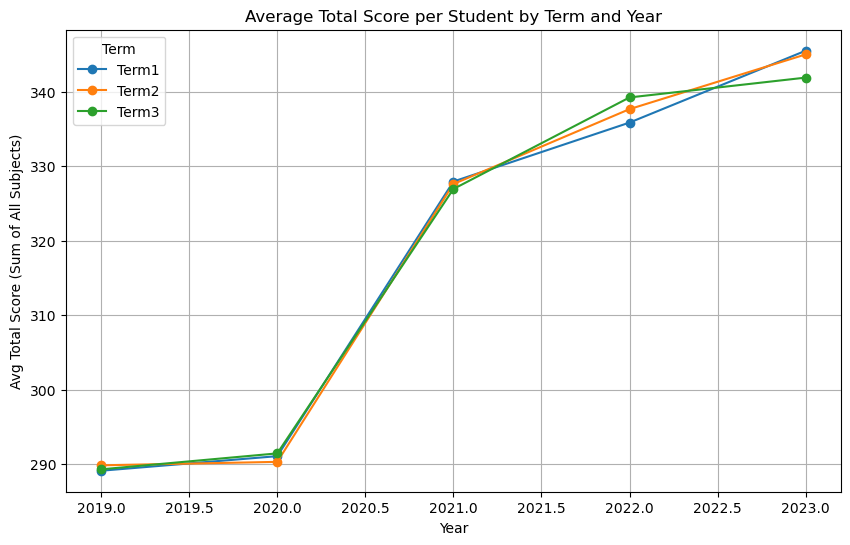

In [29]:
# Visualize

import matplotlib.pyplot as plt

term_year_total.plot(marker='o', figsize=(10,6))
plt.title("Average Total Score per Student by Term and Year")
plt.xlabel("Year")
plt.ylabel("Avg Total Score (Sum of All Subjects)")
plt.grid(True)
plt.legend(title='Term')
plt.show()


## Key Observations: Term & Year Performance Trends

1. Significant Growth Post-2020: There is a clear jump in total scores from 2020 to 2021, indicating a strong post-COVID recovery.

2. Consistent Improvement: Scores steadily increased from 2019 (avg ~289) to 2023 (avg ~344), suggesting improvements in teaching quality, learning strategies, or student support.

3. Peak Performance: The highest total scores were observed in 2023, with Term 1 leading at 345.52, closely followed by Term 2.

4. Pre-COVID Stability: From 2019 to 2020, scores were relatively flat, indicating a stable but low-performing system.

- **Term-wise Insight:**

1. Term 3 had the highest scores in 2022 but slightly dipped in 2023 

2. Term 1 and Term 2 show strong, consistent growth year over year.

## 8.2. Regional comparison

* To understand which regions performed better, we'll compute and visualize the total subject scores grouped by Region


In [31]:
# Step 1: Total score per student per region, year and term
student_region_total = (
    df_merged_performance.groupby(['Student_ID', 'Region', 'Year', 'Term'])['Score']
    .sum()
    .reset_index(name='total_score')
)

# Step 2: Average total_score across students per region, year and term
region_term_year_avg = (
    student_region_total.groupby(['Region', 'Year', 'Term'])['total_score']
    .mean()
    .reset_index()
    .pivot_table(index=['Year', 'Term'], columns='Region', values='total_score')
    .sort_index()
)

region_term_year_avg


Region      Cresthaven     Myrelia   Northvale    Sunderal   Vornstead  \
Year Term                                                                
2019 Term1  290.571429  296.849462  288.477064  293.395349  285.321429   
     Term2  285.152381  294.010753  293.123853  293.395349  291.035714   
     Term3  288.866667  285.860215  292.669725  289.023256  289.473214   
2020 Term1  293.876190  297.913978  292.155963  284.488372  290.366071   
     Term2  292.447619  296.784946  289.486239  288.430233  291.589286   
     Term3  289.228571  290.043011  293.256881  286.639535  287.142857   
2021 Term1  331.257143  327.290323  322.981651  323.709302  329.392857   
     Term2  331.028571  327.150538  323.720183  333.383721  327.803571   
     Term3  325.780952  321.720430  329.270642  324.500000  321.660714   
2022 Term1  341.514286  333.086022  332.435780  342.267442  336.535714   
     Term2  335.123810  336.419355  337.454128  335.383721  334.803571   
     Term3  336.314286  344.913978  334.899083  346.395349  346.589286   
2023 Term1  345.219048  348.623656  345.463303  344.779070  345.473214   
     Term2  338.923810  348.430108  345.522936  345.220930  340.794643   
     Term3  346.466667  340.322581  341.711009  344.279070  337.901786   

Region         Zerador  
Year Term               
2019 Term1  287.362694  
     Term2  287.116580  
     Term3  288.357513  
2020 Term1  289.720207  
     Term2  288.668394  
     Term3  293.676166  
2021 Term1  330.538860  
     Term2  327.652850  
     Term3  329.295337  
2022 Term1  335.318653  
     Term2  340.134715  
     Term3  337.401554  
2023 Term1  345.054404  
     Term2  346.759067  
     Term3  341.787565

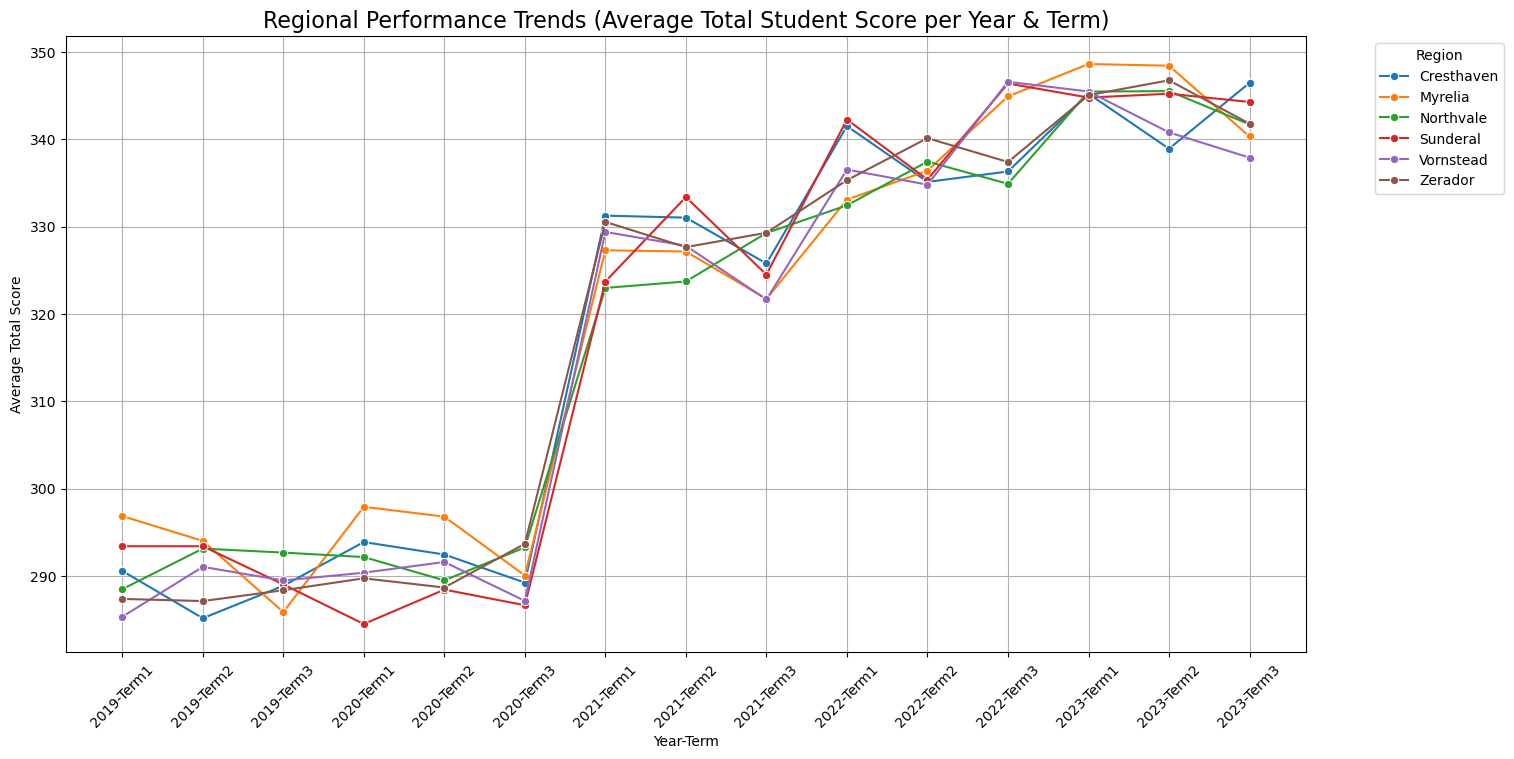

In [32]:
# Plot Average Scores per Region, Year, and Term

df_plot = region_term_year_avg.reset_index().melt(id_vars=['Year', 'Term'], var_name='Region', value_name='Average_Score')

# Plot Average Scores per Region, Year, and Term

import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined column for sequential x-axis labels
df_plot['Year_Term'] = df_plot['Year'].astype(str) + '-' + df_plot['Term']

# To preserve the correct order on the x-axis
df_plot['Year_Term'] = pd.Categorical(df_plot['Year_Term'], 
    categories=sorted(df_plot['Year_Term'].unique(), key=lambda x: (x.split('-')[0], x.split('-')[1])),
    ordered=True
)

# Plot

plt.figure(figsize=(16, 8))
sns.lineplot(data=df_plot, x='Year_Term', y='Average_Score', hue='Region', marker='o')

plt.title('Regional Performance Trends (Average Total Student Score per Year & Term)', fontsize=16)
plt.xlabel('Year-Term')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Key Observations

* There was consistent growth across all regions

* All six regions show a steady increase in average performance from 2019 to 2023.

* The rise is particularly notable between 2020 and 2021, necessitating further investigation to understand the cause.

- **Top Performing Regions**

    * Myrelia and Sunderal consistently lead across most terms, especially from 2021 onward.
    
    * By 2023, Myrelia achieves the highest scores across Terms 1 and 2.

- **Notable Improvements**

    * Cresthaven showed a major jump in scores between 2020 and 2021, maintaining steady growth afterward.
    
    * Zerador displayed a significant leap in performance in 2021, catching up with other regions.

- **Variations Across Terms**

    * Term 1 often has slightly higher scores compared to Terms 2 and 3.
    
 - **Closing Gaps**

    * The performance gap between top and lower-performing regions narrows over time, indicating a trend toward equity in education quality across regions.

## 8.3 Boarding Status Performance Analysis

In [37]:
# Step 1: Total score per student per boarding_status, year and term
student_boarding_total = (
    df_merged_performance.groupby(['Student_ID', 'BoardingStatus', 'Year', 'Term'])['Score']
    .sum()
    .reset_index(name='total_score')
)

# Step 2: Average total_score across students per boarding_status, year and term
boarding_term_year_avg = (
    student_boarding_total.groupby(['BoardingStatus', 'Year', 'Term'])['total_score']
    .mean()
    .reset_index()
    .pivot_table(index=['Year', 'Term'], columns='BoardingStatus', values='total_score')
    .sort_index()
)

boarding_term_year_avg


BoardingStatus    Boarding         Day
Year Term                             
2019 Term1      286.897351  292.497475
     Term2      287.264901  293.767677
     Term3      288.849338  289.989899
2020 Term1      290.215232  292.378788
     Term2      289.846026  291.005051
     Term3      292.000000  290.593434
2021 Term1      328.629139  326.911616
     Term2      327.163907  328.297980
     Term3      326.922185  326.989899
2022 Term1      335.903974  335.810606
     Term2      337.758278  337.542929
     Term3      337.629139  341.704545
2023 Term1      345.299669  345.845960
     Term2      343.834437  346.833333
     Term3      342.622517  340.810606

## Key Observations:

- **2019–2020 (Pre-COVID and COVID Onset):**

    * Day schools had higher average scores than boarding schools in most terms
    * The performance gap was narrow but consistent, with Day students outperforming Boarding students in 5 out of 6 terms.

- **2021 (Post-COVID Rebound):**

    * Scores between both groups nearly converged, with Boarding students slightly outperforming in Term 1, while Day students led in Term 2.

    * Indicates equal recovery across school types after pandemic-related challenges.

- **2022 (Stabilization Period):**

    * A very tight race in Term 1 and Term 2 shows strong parity.

    * However, Day schools surpassed Boarding schools notably in Term 3 (Day: 341.70 vs. Boarding: 337.63), suggesting better academic momentum heading into exam periods.

- **2023 (Recent Trends):**

    * Performance flipped between terms:

    * Term 1: Day schools slightly outperformed Boarding.

    * Term 2: Day schools clearly led by ~3 points.

    * Term 3: Boarding reclaimed the lead with ~2-point advantage.

- **Insights & Interpretation:**
    * Over the five-year period, Day schools consistently performed at par or better than Boarding schools.

    * This defies traditional assumptions that Boarding environments always produce stronger academic outcomes, highlighting the importance of home-based support, community involvement, or better teacher-to-student ratios in Day schools worth further review and confirmation

## 8.4 Gender & Subject trends over time

In [36]:
# Step 1: Total score per student per term
student_term_score = (
    df_merged_performance.groupby(['Student_ID', 'Year', 'Term', 'Gender'])['Score']
    .sum()
    .reset_index(name='term_total')
)

# Step 2: Total annual score per student (sum of all 3 terms)
student_year_score = (
    student_term_score.groupby(['Student_ID', 'Year', 'Gender'])['term_total']
    .sum()
    .reset_index(name='annual_total_score')
)

# Step 3: Divide by 3 to get average per term
student_year_score['avg_per_term'] = student_year_score['annual_total_score'] / 3

# Step 4: Average score per gender per year
gender_year_avg = (
    student_year_score.groupby(['Year', 'Gender'])['avg_per_term']
    .mean()
    .reset_index()
    .pivot(index='Year', columns='Gender', values='avg_per_term')
    .sort_index()
)

gender_year_avg


Gender,F,M
Year,,
2019,289.496188,289.346821
2020,290.633403,291.224149
2021,328.273735,326.789981
2022,337.316701,337.851638
2023,344.011088,344.274245


In [32]:
# Step 5: Average score per gender per year per Subject
gender_subject_avg = (
    df_merged_performance.groupby(['Year', 'Gender', 'Subject'])['Score']
    .mean()
    .reset_index()
)
gender_subject_avg




,Year,Gender,Subject,Score
0,2019,F,English,63.781705
1,2019,F,ICT,69.463617
2,2019,F,Math,49.736660
3,2019,F,Science,48.661816
4,2019,F,Social Studies,57.852391
5,2019,M,English,63.817598
6,2019,M,ICT,68.401413
7,2019,M,Math,50.858703
8,2019,M,Science,48.897881
9,2019,M,Social Studies,57.371227


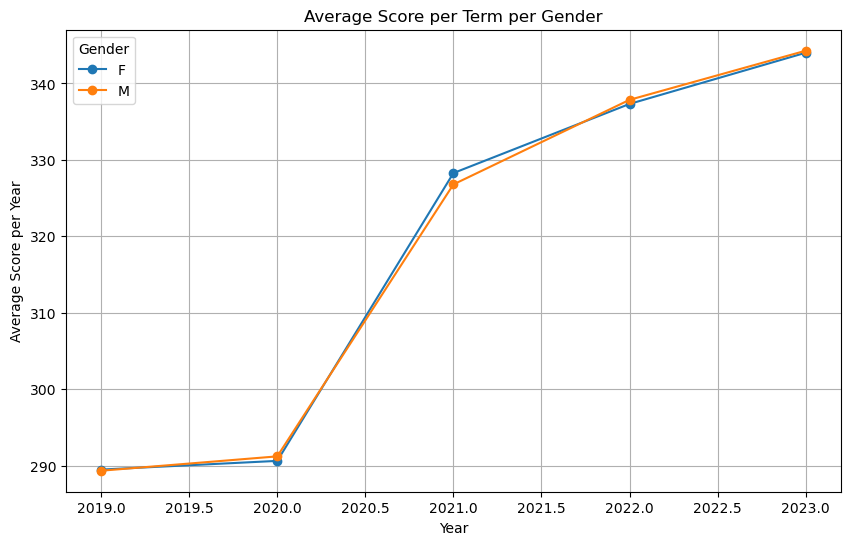

In [38]:
# Plot of average score per gender by year using a line chart for clear trend comparison

import matplotlib.pyplot as plt

# Plotting
gender_year_avg.plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Average Score per Term per Gender')
plt.xlabel('Year')
plt.ylabel('Average Score per Year')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


## Gender & Subject Trends 

- **Overall Summary:**
    * Both male and female students have shown steady improvement in average scores from 2019 to 2023. Performance has remained competitive with no consistent dominance by either gender.

- **Key Highlights:**

    * 2019–2020: Scores were fairly balanced. Females had a slight lead in 2019, while males edged ahead in 2020.
    
    * 2021: Marked improvement for both genders. Females led slightly.
    
    * 2022: Males had a marginal lead.
    
    * 2023: Near tie with males averaging just 0.26 points higher.

- **Subject-Level Trends:**

    * English & ICT: Both genders improved consistently. Females excelled in English, males in ICT.
    
    * Math & Science: Steady rise in scores, with males slightly outperforming in recent years.
    
    * Social Studies: Females led in earlier years, but scores leveled out by 2023.

- **Conclusion:**
    * The gender gap has narrowed significantly.

## 8.5 Parental Education Impact on Student Scores

* This analysis explores how the level of parental education correlates with average student scores over the years 2019 to 2023.

In [39]:
# Step 1: Total score per student per term
student_term_score = (
    df_merged_performance.groupby(['Student_ID', 'Year', 'Term', 'Parent_Education'])['Score']
    .sum()
    .reset_index(name='term_total')
)

# Step 2: Total annual score per student (sum of all 3 terms)
student_year_score = (
    student_term_score.groupby(['Student_ID', 'Year', 'Parent_Education'])['term_total']
    .sum()
    .reset_index(name='annual_total_score')
)

# Step 3: Divide by 3 to get average per term
student_year_score['avg_score'] = student_year_score['annual_total_score'] / 3

# Step 4: Average score per Parent_Education per year
pedu_year_avg = (
    student_year_score.groupby(['Year', 'Parent_Education'])['avg_score']
    .mean()
    .reset_index()
    .pivot(index='Year', columns='Parent_Education', values='avg_score')
    .sort_index()
)

pedu_year_avg


Parent_Education,None,Primary,Secondary,Tertiary,Vocational
Year,,,,,
2019,291.626214,289.371528,290.297209,285.731183,289.708920
2020,291.731392,292.598958,289.356322,290.876344,290.244131
2021,326.590615,328.711806,328.333333,325.849462,327.951487
2022,339.187702,338.112847,336.339901,336.921147,337.369327
2023,344.666667,343.720486,342.940887,345.301075,344.173709


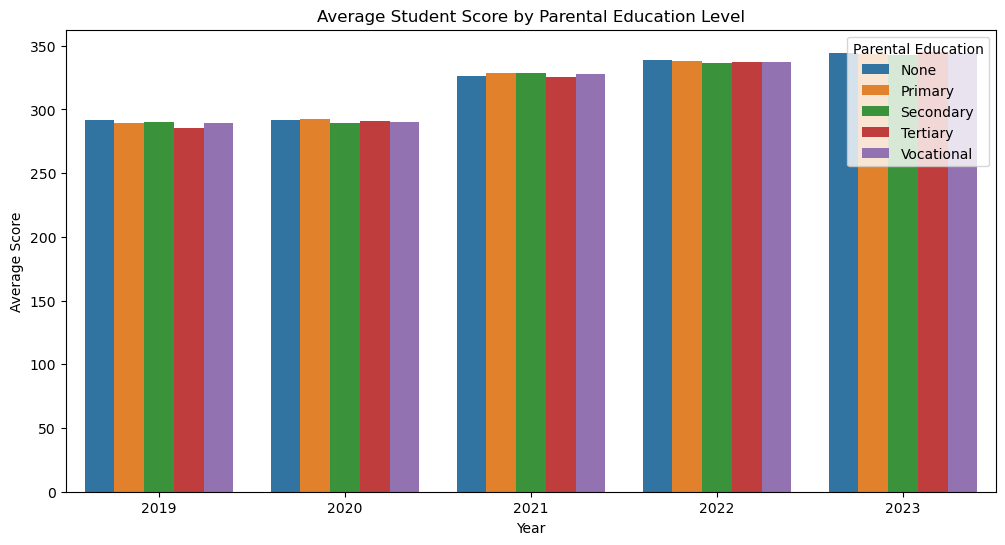

In [40]:
# Plot of average score per parent_education by year 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt pedu_year_avg to long format
pedu_melted = pedu_year_avg.reset_index().melt(id_vars='Year', var_name='Parent_Education', value_name='avg_score')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='avg_score', hue='Parent_Education', data=pedu_melted)
plt.title('Average Student Score by Parental Education Level')
plt.ylabel('Average Score')
plt.legend(title='Parental Education')
plt.show()


##  Key Observations: Parental Education and Student Performance

- **2019–2020**  
  * Differences in average scores across parental education levels were minimal.  
  * Students whose parents had no formal education slightly outperformed others, although the variation remained under 2 points across all groups.

- **2021**  
  * A notable overall increase in scores was observed.  
  * Students whose parents attained Primary or Vocational education showed slightly higher averages.  
  * However, the gap among education levels remained narrow (around 3 points).

- **2022–2023**  
  Scores continued to improve across all categories.  
  In 2023:
  - Students with Tertiary-educated parents had the highest average scores (**345.30**).
  - Closely followed by students whose parents had no formal education (**344.67**).  
  - Overall, the performance gap across education levels remained consistently small (typically less than 3 points).


###  Conclusion:

While average student scores have increased significantly from 2019 to 2023, parental education level appears to have a minimal impact on overall student performance.  
The differences between groups are minor, suggesting that other factors play a stronger role in shaping academic outcomes.


## 8.6  Household Income Correlation

Correlation between Household Income and Student Score: 0.0140


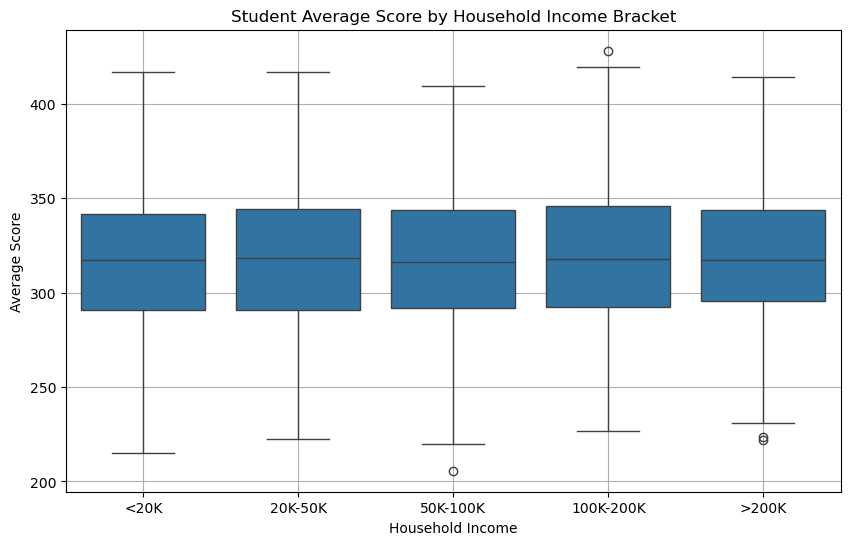

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order and midpoint values for each income category
income_order = ["<20K", "20K-50K", "50K-100K", "100K-200K", ">200K"]
income_mapping = {
    "<20K": 10000,
    "20K-50K": 35000,
    "50K-100K": 75000,
    "100K-200K": 150000,
    ">200K": 250000
}

# Step 1: Total score per student per term
student_term_score = (
    df_merged_performance.groupby(['Student_ID', 'Year', 'Term', 'Household_Income'])['Score']
    .sum()
    .reset_index(name='term_total')
)

# Step 2: Total annual score per student (sum of all 3 terms)
student_year_score = (
    student_term_score.groupby(['Student_ID', 'Year', 'Household_Income'])['term_total']
    .sum()
    .reset_index(name='annual_total_score')
)

# Step 3: Divide by 3 to get average per term
student_year_score['avg_score'] = student_year_score['annual_total_score'] / 3

# Step 4: Replace income category with midpoint numeric value for correlation
student_year_score['Income_Midpoint'] = student_year_score['Household_Income'].map(income_mapping)

# Drop rows with missing values (if any)
student_year_score.dropna(subset=['Income_Midpoint', 'avg_score'], inplace=True)

# Step 5: Calculate correlation
correlation = student_year_score['Income_Midpoint'].corr(student_year_score['avg_score'])
print(f"Correlation between Household Income and Student Score: {correlation:.4f}")

# Step 6: Plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_year_score, x='Household_Income', y='avg_score', order=income_order)
plt.title('Student Average Score by Household Income Bracket')
plt.xlabel('Household Income')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()


## Key Findings

- **Weak Positive Correlation:**  

The correlation coefficient between household income and student average score is 0.0140, indicating a very weak positive relationship. This suggests that household income has minimal impact on student performance across all years.

## Additional Analysis
   - **Top 10 Performing Students Overall for year 2023**

Step 1: Filtered 2023 data: (15000, 16)
Step 2: Score per student per term: (3000, 3)
Step 3: Average across terms: (1000, 2)


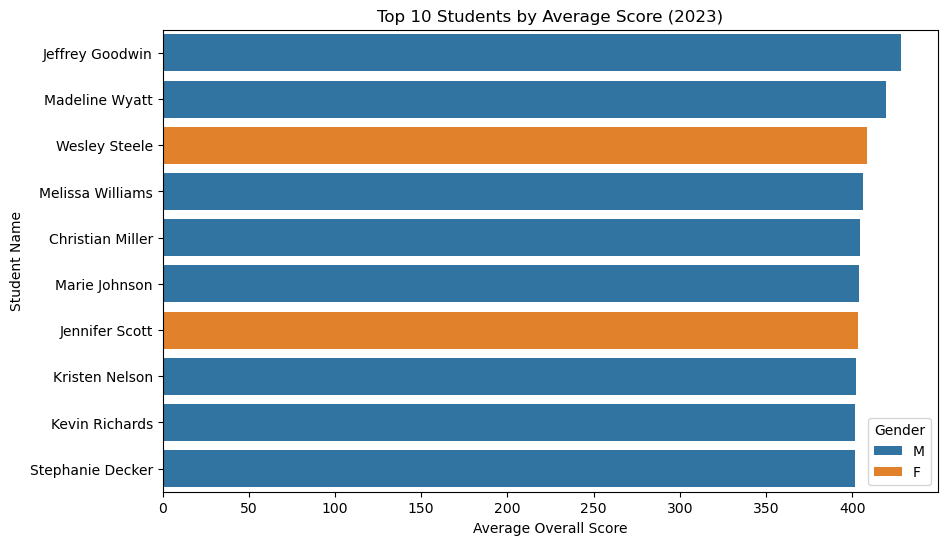

In [42]:
# Step 1: Filter year 2023
df_2023 = df_merged_performance[df_merged_performance['Year'] == 2023]
print("Step 1: Filtered 2023 data:", df_2023.shape)

# Step 2: Total score per student per term
df_term_totals = df_2023.groupby(['Student_ID', 'Term'])['Score'].sum().reset_index(name='Term_Total_Score')
print("Step 2: Score per student per term:", df_term_totals.shape)

# Step 3: Average total score across terms
df_student_avg = df_term_totals.groupby('Student_ID')['Term_Total_Score'].mean().reset_index(name='Avg_Overall_Score')
print("Step 3: Average across terms:", df_student_avg.shape)

# Step 4: Join back student details (student name, gender & School)
student_details = df_merged_performance[['Student_ID', 'Student_Name', 'Gender', 'School_Name']].drop_duplicates()
df_top_students = df_student_avg.merge(student_details, on='Student_ID', how='left')

# Step 5: Sort and display top 10
df_top_10 = df_top_students.sort_values(by='Avg_Overall_Score', ascending=False).head(10)
df_top_10['Avg_Overall_Score'] = df_top_10['Avg_Overall_Score'].round(2)

# Step 6: Visualize top 10 students

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df_top_10, x='Avg_Overall_Score', y='Student_Name', hue='Gender', dodge=False)
plt.title("Top 10 Students by Average Score (2023)")
plt.xlabel("Average Overall Score")
plt.ylabel("Student Name")
plt.show()

- **Proportion (%) of students from each Country within each Gender.**

In [98]:

pd.crosstab(df_merged_performance['Gender'], df_merged_performance['Country'], normalize='index')


Country,Montalei,Utopia,Val Verde,Wakanda
Gender,,,,
F,0.334719,0.214137,0.081081,0.370062
M,0.292871,0.183044,0.102119,0.421965


- **Distribution of student scores**

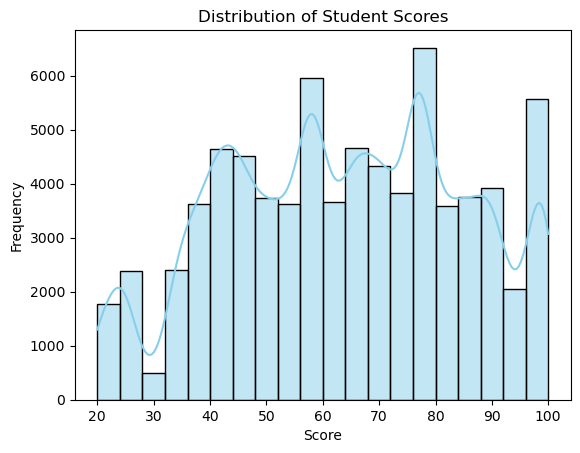

In [99]:

sns.histplot(df_merged_performance['Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


# 9.  Final Conclusion and Recommendations

  ### **Conclusion**

The EduPulse data analysis from 2019–2023 has uncovered insightful trends related to academic performance, demographics, and school dynamics:

1. **COVID-19 Impact**  
   - Performance was steady through 2019–2020, with a notable post-pandemic improvement in 2021. This may reflect recovery measures such as enhanced teaching strategies, revised assessments, or digital interventions worth further review and confirmation.

2. **Regional and School Type Trends**  
   - Myrelia and Cresthaven consistently outperformed other regions.
   - Day schools have slightly outpaced boarding schools since 2022, especially during pandemic recovery, suggesting that home support may have contributed to learning continuity.

3. **Gender and Subject Performance**  
   - Performance between male and female students remained close, with no sustained gender gaps.
   - Female students showed stronger gains in Math and Science between 2021–2023, narrowing the historical gender divide.

4. **Parental Education Influence**  
   - While average student scores have increased significantly from 2019 to 2023, parental education level appears to have a minimal impact on overall student performance.  
    - The differences between groups are minor, suggesting that other factors may play a stronger role in shaping academic outcomes.

5. **Household Income Correlation**  
   - The correlation between income and academic performance was very weak (r = 0.014).
   - This suggests that income alone does not predict success — school environment and support systems may be more influential.



### **Recommendations**

1. **Target Underperforming Regions**  
   Direct investments toward regions like Zerador and Sunderal through better teacher training, infrastructure, and regional performance monitoring.

2. **Enhance Math and Science Instruction**  
   Sustain the gains in STEM subjects by adopting adaptive learning tools and investing in teacher upskilling.

3. **Revitalize Boarding Schools**  
   Re-evaluate boarding school strategies—especially in student engagement, pastoral care, and academic rigor — to close the emerging gap with day schools.

4. **Focus on Equity Beyond Income**  
   Prioritize interventions that address learning needs and school quality, regardless of a student’s income bracket, to promote equal opportunity for all learners.

---

 *The EduPulse Dashboard serves as a blueprint for using data to drive actionable insights and improve educational outcomes across diverse demographics.*
 
---
                                               Prepared By Ann Kandie
